# 5. SVM
- 선형이나 비선형 분류, 회귀 이상치 탐색에도 사용할 수 있는 다목적 머신러닝 모델

## 5.1 선형 SVM분류
- 결정경계가 Train 샘플에서 가능한한 가장 거리가 먼 것을 고른다.
- 라지 마진 분류라고도 한다.
- 경계에 위치한 데이터를 Support Vector라고 한다.

### 5.1.1 소프트,하드 마진분류
- 선형적으로 구분짓기 힘든 이상치가 존재하면 하드 마진 분류
- 이상치를 어느정도 허용하는 것이 소프트 마진 분류
- HyperParameter C를 조절할 수 있으며, 작을 수록 마진이 넓고 일반화가 더 잘되는 대신, 마진 오류가 높다.

## 5.2 비선형 SVM분류
- 선형으로 구분할 수 없는 데이터셋에 대해 특성을 추가 하여 선형으로 구분할 수 있도록 한다.
- PolynomialFeatures변환기를 사용하여 이를 구현할 수 있다.

In [29]:
import pandas as pd
from sklearn.model_selection import train_test_split

rawD = pd.read_csv('./datasets/world-happiness-report.csv')
rawD.head()

,Country name,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
0,Afghanistan,2008,3.724,7.370,0.451,50.80,0.718,0.168,0.882,0.518,0.258
1,Afghanistan,2009,4.402,7.540,0.552,51.20,0.679,0.190,0.850,0.584,0.237
2,Afghanistan,2010,4.758,7.647,0.539,51.60,0.600,0.121,0.707,0.618,0.275
3,Afghanistan,2011,3.832,7.620,0.521,51.92,0.496,0.162,0.731,0.611,0.267
4,Afghanistan,2012,3.783,7.705,0.521,52.24,0.531,0.236,0.776,0.710,0.268


In [34]:
rawD.describe()

,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
count,1949.000000,1949.000000,1913.000000,1936.000000,1894.000000,1917.000000,1860.000000,1839.000000,1927.000000,1933.000000
mean,2013.216008,5.466705,9.368453,0.812552,63.359374,0.742558,0.000103,0.747125,0.710003,0.268544
std,4.166828,1.115711,1.154084,0.118482,7.510245,0.142093,0.162215,0.186789,0.107100,0.085168
min,2005.000000,2.375000,6.635000,0.290000,32.300000,0.258000,-0.335000,0.035000,0.322000,0.083000
25%,2010.000000,4.640000,8.464000,0.749750,58.685000,0.647000,-0.113000,0.690000,0.625500,0.206000
50%,2013.000000,5.386000,9.460000,0.835500,65.200000,0.763000,-0.025500,0.802000,0.722000,0.258000
75%,2017.000000,6.283000,10.353000,0.905000,68.590000,0.856000,0.091000,0.872000,0.799000,0.320000
max,2020.000000,8.019000,11.648000,0.987000,77.100000,0.985000,0.698000,0.983000,0.944000,0.705000


In [30]:
DX = rawD[['Freedom to make life choices','Positive affect']]
DY = rawD[['Perceptions of corruption','Positive affect']]

C:\Users\LGCNS\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
C:\Users\LGCNS\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
C:\Users\LGCNS\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]
C:\Users\LGCNS\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and

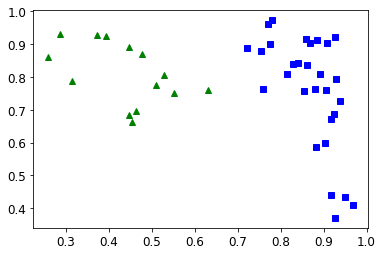

In [54]:
# Xtrain, Xtest, Ytrain, Ytest = train_test_split(DX, DY, test_size=0.3)
plt.plot(DX['Freedom to make life choices'][DX['Positive affect']>0.88], DY['Perceptions of corruption'][DY['Positive affect']>0.88], "bs")
plt.plot(DX['Freedom to make life choices'][DX['Positive affect']<=0.44], DY['Perceptions of corruption'][DY['Positive affect']<=0.44], "g^")

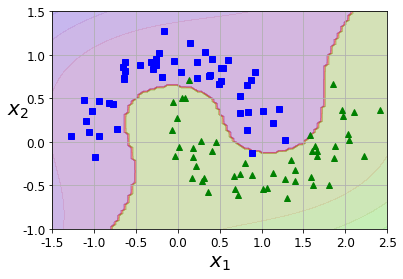

In [73]:
import numpy as np
from sklearn import datasets
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC
from sklearn.preprocessing import PolynomialFeatures
from sklearn.datasets import make_moons

X, y = make_moons(n_samples=100, noise=0.15, random_state=42)

polynomial_svm_clf = Pipeline([
        ("poly_features", PolynomialFeatures(degree=3)), #3차식
        ("scaler", StandardScaler()),
        ("svm_clf", LinearSVC(C=10, loss="hinge", max_iter=2000, random_state=42))
    ])

polynomial_svm_clf.fit(X, y)

def plot_predictions(clf, axes):
    x0s = np.linspace(axes[0], axes[1], 100)
    x1s = np.linspace(axes[2], axes[3], 100)
    x0, x1 = np.meshgrid(x0s, x1s)
    X = np.c_[x0.ravel(), x1.ravel()]
    y_pred = clf.predict(X).reshape(x0.shape)
    y_decision = clf.decision_function(X).reshape(x0.shape)
    plt.contourf(x0, x1, y_pred, cmap=plt.cm.brg, alpha=0.2)
    plt.contourf(x0, x1, y_decision, cmap=plt.cm.brg, alpha=0.1)

plot_predictions(polynomial_svm_clf, [-1.5, 2.5, -1, 1.5])
plot_dataset(X, y, [-1.5, 2.5, -1, 1.5])

#save_fig("moons_polynomial_svc_plot")
plt.show()

### 5.2.1 다항식 커널
- 다항식 특성 추가는 모델을 느리게 만들 수 있음
- 커널 트릭을 사용하여 다항식 특성을 추가하지 않고도 특성을 추가한 것과 같은 효과

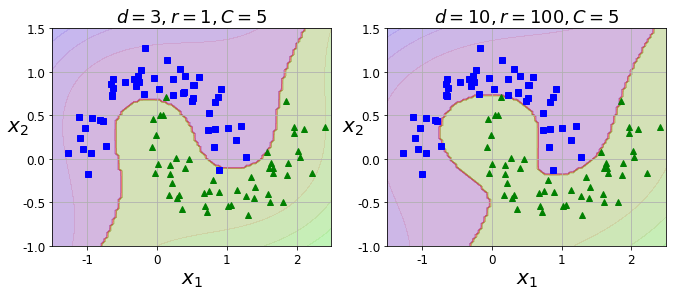

In [84]:
from sklearn.svm import SVC

# coef0가 높으면 고차수의 영향을 많이 받는다. 기본값은 0
# 3차항 분류기
poly_kernel_svm_clf = Pipeline([
        ("scaler", StandardScaler()),
        ("svm_clf", SVC(kernel="poly", degree=3, coef0=1, C=5))
    ])
poly_kernel_svm_clf.fit(X, y)

# 10차항 분류기
poly100_kernel_svm_clf = Pipeline([
        ("scaler", StandardScaler()),
        ("svm_clf", SVC(kernel="poly", degree=10, coef0=100, C=5))
    ])
poly100_kernel_svm_clf.fit(X, y)

plt.figure(figsize=(11, 4))

plt.subplot(121)
plot_predictions(poly_kernel_svm_clf, [-1.5, 2.5, -1, 1.5])
plot_dataset(X, y, [-1.5, 2.5, -1, 1.5])
plt.title(r"$d=3, r=1, C=5$", fontsize=18)

plt.subplot(122)
plot_predictions(poly100_kernel_svm_clf, [-1.5, 2.5, -1, 1.5])
plot_dataset(X, y, [-1.5, 2.5, -1, 1.5])
plt.title(r"$d=10, r=100, C=5$", fontsize=18)

#save_fig("moons_kernelized_polynomial_svc_plot")
plt.show()

### 5.2.2 유사도 특성
- 특정 랜드마크와 얼마나 닮았는지 측정하는 유사도 함수로 계산한 특성을 추가하는 것.
- 가우시안 방사 기저 함수(RBF) 를 유사도 함수로 정의 한다면 : 랜드마크로 부터 가까울수록 1을 주고 멀수록 0을 주는 방식의 종모양 차트
- 모든 샘플 위치에 랜드마크를 설정하여 여러개의 차원을 형성하면 선형적으로 구분될 확률이 높아진다.

### 5.2.3 가우시안 RBF 커널
- 유사도 특성을 많이 추가하는 것과 비슷한 결과를 얻을 수 있다.
- gamma 값을 바꿀 수 있으며, gamma값이 클수록 가파른 종모양이 된다. 각 샘플의 영향범위가 작아지며, 결정경계가 불규칙해진다.
- 과대적합일 땐 감소시키고, 과소적합일 때는 증가시켜야한다.
- 다른 커널은 거의 사용하지 않음
- 선형 커널을 먼저 적용해 보고, 데이터가 너무 크지 않으면 가우시안 RBF 커널을 사용한다.

### 5.2.4 시간 복잡도
- LinearSVC : O(mn) , 커널트릭X
- SGDClassifier : O(mn), 커널트릭X
- SVC : O(m^2n)~O(m^3n), 커널트릭O

## 5.3 SVM 회귀
- SVM 분류와 반대로 마진오류가 허용되는 한에서, 경계간격 안에 최대한 많은 데이터가 들어가도록 하는 것.

## 5.4 SVM 이론
### 5.4.1 결정 함수와 예측
- 선형 분류기 : 결정함수 w^Tx + b = w_1x_1 + ... + w_nx_x + b 를 계산한다.
- w^Tx + b < 0 이면 0 / w^Tx + b >= 0 이면 1

### 5.4.2 목적 함수
- 가중치 벡터 w가 작을수록 마진이 커진다.
- 하드마진 선형 SVM 분류기의 목적함수
    - minimize 1/2 w^T w
- 소프트마진 선형 SVM 분류기의 목적함수
    - minimize 1/2 w^T w + C$\sum_{i=1}^{m} slackvar_i$
    - 슬랙변수는 i번째 데이터가 마진을 얼마나 위배할지에 대한 값

### 5.4.3 콰드라틱 프로그래밍
- 이 책의 범위를 벗어납니다

### 5.4.4 쌍대문제(Dual Problem)
- 어떤 원문제(Primal Problem) 최적값의 하한과 상한으로 검증하는 것.
- 원 문제가 최대값일 경우 쌍대문제는 하한값을 가진다.
- 둘 중 하나를 풀면 그 해는 다른 하나의 해이기도 하다.
- SVC, SVR은 dual=True 매개변수를 통해 항상 쌍대문제를 다룬다.
- 훈련샘플수가 특성 개수보다 작을 때 쌍대문제를 푸는 것이 빠르다.
- 쌍대문제는 원문제에서 적용할 수 없는 커널 트릭을 가능하게 한다
- 쌍대문제를 푸는 궁극적인 목적이 커널트릭에 있으므로 쌍대문제를 그냥 받아드리고, 쌍대문제에서 나타나는 커널함수에 대한 설명을 중점적으로 하기 때문인 것
- https://nbviewer.jupyter.org/github/metamath1/ml-simple-works/blob/master/svm/duality.ipynb

### 5.4.5 커널 SVM
- 2차원의 데이터셋을 고차원의 데이터셋으로 변환하는 과정
- 고차원의 데이터셋에 선형 SVM 알고리즘을 적용하는 방식이며 기존 데이터셋에 비선형 SVM 알고리즘을 적용하는 것에 비해 전체 과정에 필요한 계산량 측면에서 효율적
- 매개변수 kernel
    - linear : a^T b
    - poly : (gamma a^T b + r)^d
    - rbf. : exp(-gamma || a-b ||^2 )
    - sigmoid : tanh(gamma a^T b + r)
    
### 5.4.6 온라인 SVM
- 